### KDTree
Open3D uses [FLANN](https://www.cs.ubc.ca/research/flann/) to build KDTrees for fast retrieval of nearest neighbors.
#### Build KDTree from point cloud
The code below reads a point cloud and builds a KDTree. This is a preprocessing step for the following nearest neighbor queries.

In [2]:
import open3d as o3d 
import numpy as np 
import matplotlib.pyplot as plt 
import copy
import Open3D.examples.python.open3d_tutorial as o3dtut

[download_utils.py] C:\Users\Administrator\Jupyter_samples\open3d\Open3D\examples\test_data\open3d_downloads\RGBD\normal_map.npy already exists, skipped.
[download_utils.py] C:\Users\Administrator\Jupyter_samples\open3d\Open3D\examples\test_data\open3d_downloads\RGBD\raycast_vtx_004.npy already exists, skipped.
[download_utils.py] C:\Users\Administrator\Jupyter_samples\open3d\Open3D\examples\test_data\open3d_downloads\tests\cube.obj already exists, skipped.
[download_utils.py] C:\Users\Administrator\Jupyter_samples\open3d\Open3D\examples\test_data\open3d_downloads\RGBD\vertex_map.npy already exists, skipped.


In [3]:
print("Testing kdtree in Open3D...")
print("Load a point cloud and paint it gray.")
pcd = o3d.io.read_point_cloud("Open3D/examples/test_data/Feature/cloud_bin_0.pcd")
pcd.paint_uniform_color([0.5, 0.5, 0.5])
pcd_tree = o3d.geometry.KDTreeFlann(pcd)

Testing kdtree in Open3D...
Load a point cloud and paint it gray.


#### Find neighboring points
We pick the 1500-th point as the anchor point and paint it red.

In [4]:
print("Paint the 1500-th point red.")
pcd.colors[1500] = [1, 0, 0]

Paint the 1500-th point red.


#### Using search_knn_vector_3d
The function **search_knn_vector_3d** returns a list of indices of the k nearest neighbors of the anchor point. These neighboring points are painted with blue color. Note that we convert **pcd.colors** to a numpy array to make batch access to the point colors, and broadcast a blue color \[0, 0, 1\] to all the selected points. We skip the first index since it is the anchor point itself.

In [5]:
print("Find its 200 nearest neighbors, and paint them blue.")
[k, idx, _] = pcd_tree.search_knn_vector_3d(pcd.points[1500], 200)
np.asarray(pcd.colors)[idx[1:], :] = [0, 0, 1]

Find its 200 nearest neighbors, and paint them blue.


#### Using search_radius_vector_3d
Similarly, we can use **search_radius_vector_3d** to query all points with distances to the anchor point less than a given radius. We paint these points with a green color.

In [13]:
print("Find its neighbors with distance less than 0.2, and paint them green.")
[k, idx, _] = pcd_tree.search_radius_vector_3d(pcd.points[1500], 0.2)
print(idx)
print(np.asarray(pcd.colors)[idx[1:], :]) #
print(np.asarray(pcd.colors)[716, :]) # [0. 0. 1.]
print(np.asarray(pcd.colors)[716, 2]) # 1.0
np.asarray(pcd.colors)[idx[1:], :] = [0, 1, 0]
print(np.asarray(pcd.colors)[idx[1:], :])

Find its neighbors with distance less than 0.2, and paint them green.
IntVector[1500, 716, 3281, 3508, 3021, 2934, 2986, 3024, 2906, 3742, 3003, 2918, 2816, 3515, 2599, 2990, 2933, 3033, 1287, 3647, 3091, 2993, 3124, 2247, 3634, 3115, 2932, 3025, 3005, 3054, 2936, 2991, 3200, 1978, 2926, 3130, 2972, 2741, 1139, 3032, 2871, 3319, 2292, 2001, 2734, 1707, 3052, 3048, 3239, 3018, 3012, 2697, 3150, 634, 147, 578, 2475, 3152, 637, 2946, 2444, 605, 2867, 3257]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [

Visualize the point cloud.


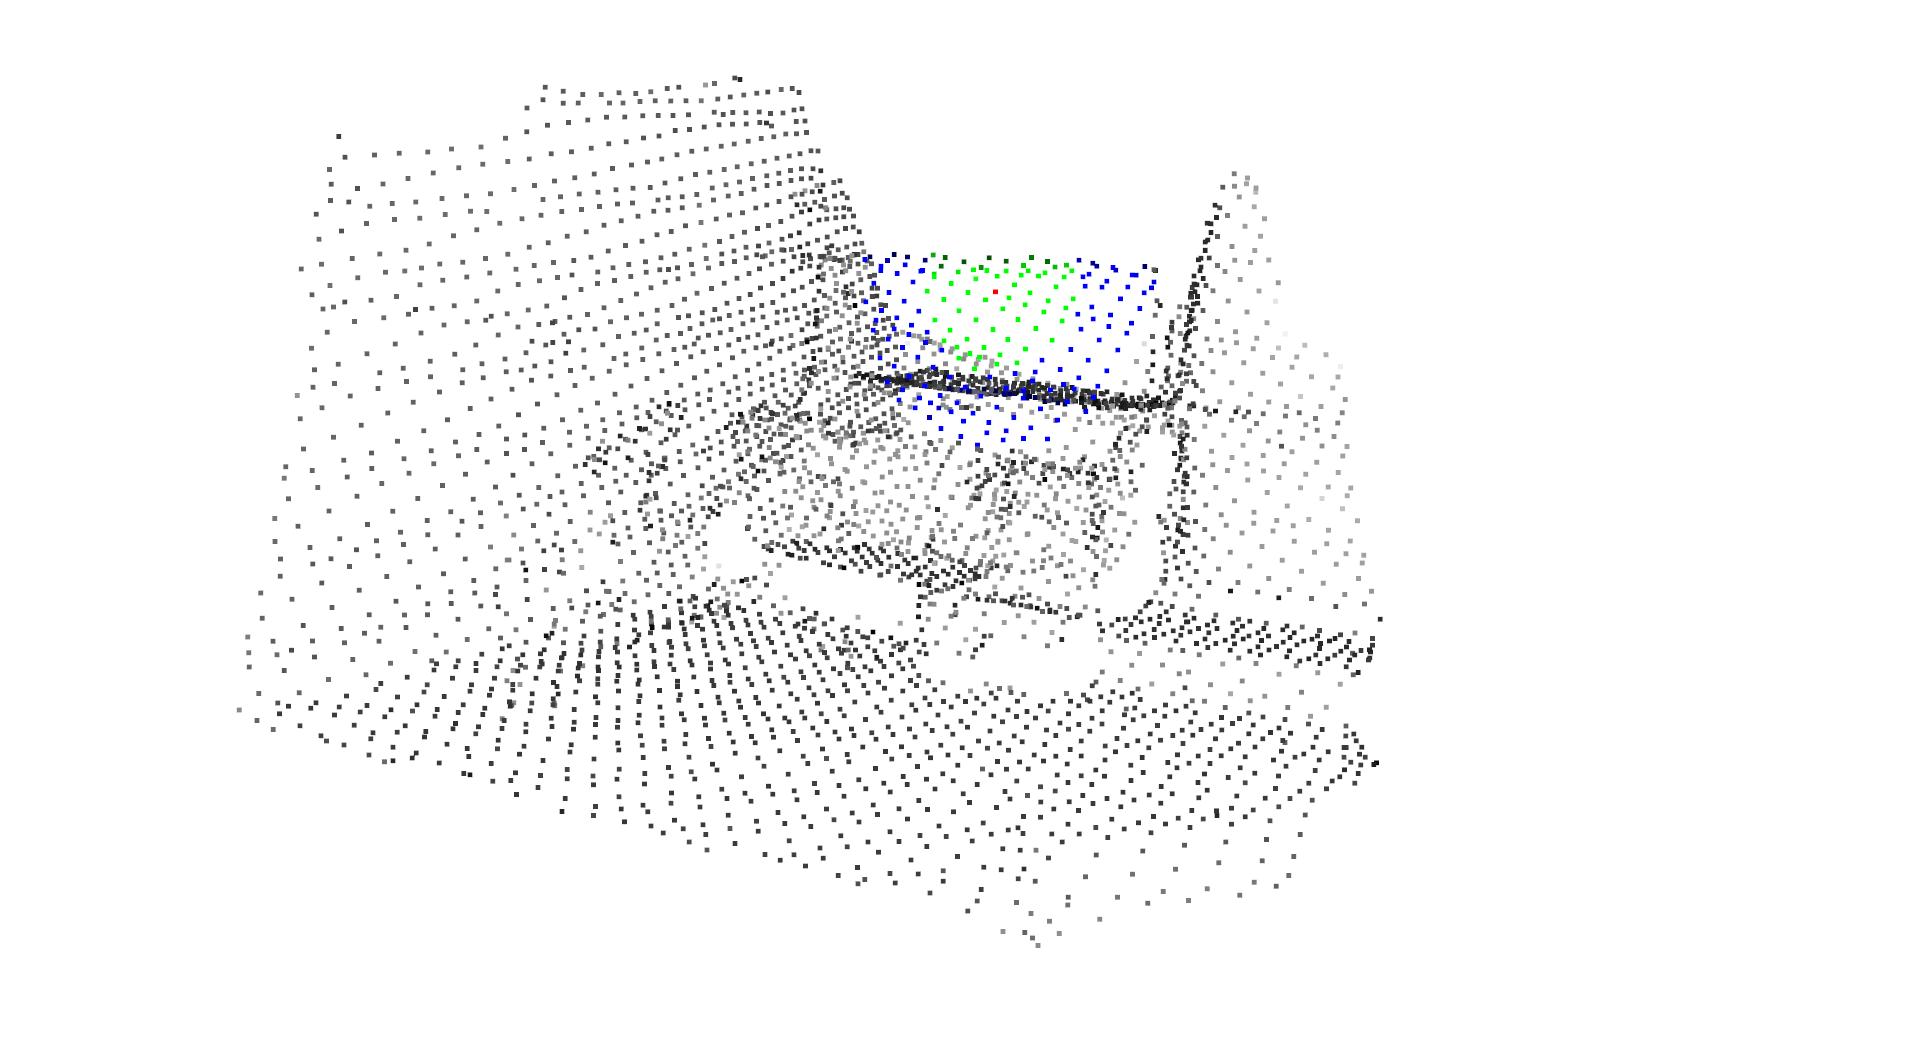

In [14]:
print("Visualize the point cloud.")
o3d.visualization.draw_geometries(
    [pcd], zoom=0.5599,
            front=[-0.4958, 0.8229, 0.2773],
            lookat=[2.1126, 1.0163, -1.8543],
            up=[0.1007, -0.2626, 0.9596]
)

#### Note:
Besides the KNN search **search_knn_vector_3d** and the RNN search **search_radius_vector_3d**, Open3D provides a hybrid search function **search_hybrid_vector_3d**. It returns at most k nearest neighbors that have distances to the anchor point less than a given radius. This function combines the criteria of KNN search and RNN search. It is known as RKNN search in some literatures. It has performance benefits in many practical cases, and is heavily used in a number of Open3D functions.